# Classification with an Academic Success Dataset

Playground Series - Season 4, Episode 6

(https://www.kaggle.com/competitions/playground-series-s4e6/)

![image](./data/header.png)

__Overview__
Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

__Your Goal:__ The goal of this competition is to predict academic risk of students in higher education.

__Dataset Description__
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Predict Students' Dropout and Academic Success dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Please refer to the original dataset for feature feature explanations.

__Files__
- train.csv - the training dataset; Target is the categorical target
- test.csv - the test dataset; your objective is to predict the class of Target for each row
- sample_submission.csv - a sample submission file in the correct format

__Models__
- K-Nearest Neighboor Model 
- Gaussian Naive Bayes Model 
- Logistic Regressor 
- Support Vector Classification Model 
- Decision Tree Model 
- Random Forest Model 
- Linear Discriminant Analysis Model 
- Gradient Boosting Classifier Model 
- Neural Network CLassifier Model 
- X Gradient Boost Classifier
- Cat Boosting Classifier

In [ ]:
%pip install -r requirements.txt --break-system-packages

In [3]:
# Import all necessary libraries

import os
import time
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import datetime as dt
import warnings as wn
import matplotlib.pyplot as plt

from catboost import Pool
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

In [4]:
# Ignore all warnings
wn.filterwarnings('ignore')

In [5]:
# Set all variables paths 

_plots = './plots/'
_tested = './tested/'
_test = './data/test.csv'
_train = './data/train.csv'
_info = './model/model.docx'
_model = './model/model.pkl'
_submission = './data/sample_submission.csv'

In [6]:
# Read training dataframe
train = pd.read_csv(_train, index_col='id')

In [7]:
# Display the first n rows of training
train.head(n=10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,1,39,1,171,1,19,133.1,1,19,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,1,44,1,9085,1,39,130.0,1,37,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,1,1,1,9773,1,1,130.0,1,19,37,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,1,39,1,9003,1,1,133.1,1,19,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout


In [8]:
# Describe the data
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [9]:
# Display more info about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [10]:
# Verify if there are null values
train.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
# Check for dublicates
print(train.duplicated().sum())
train.drop_duplicates()

0


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled


In [12]:
# Set the columns names
names = train['Target'].unique()
names

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [13]:
# Encode the string training data

for column in train.columns[:]:
    if train[column].dtype == 'O':
        encoder = LabelEncoder()
        train[column] = encoder.fit_transform(train[column])
        mapping_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [15]:
# Check proportion of the targets classes
print('Zero predicted values \t\t', train[train['Target'] == 0].shape[0])
print('One predicted values \t\t', train[train['Target'] == 1].shape[0])
print('One predicted values \t\t', train[train['Target'] == 2].shape[0])

Zero predicted values 		 25296
One predicted values 		 14940
One predicted values 		 36282


In [17]:
# Set the dataframes from training data
response = train.pop('Target')
train.insert(len(train.columns), 'Target', response)
y_data = pd.DataFrame(train['Target'])
X_data = pd.DataFrame(train.iloc[:,:-1])

In [18]:
# Reshape for unbalanced data
smoteenn = SMOTEENN()
X_data, y_data = smoteenn.fit_resample(X_data, y_data)

In [19]:
# Split The Training And Testing Data

rows = train.shape[0]
cols = train.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [20]:
# Fill the null values with zero

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [21]:
# Newer input and output data
train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1


# Plotting Training Data

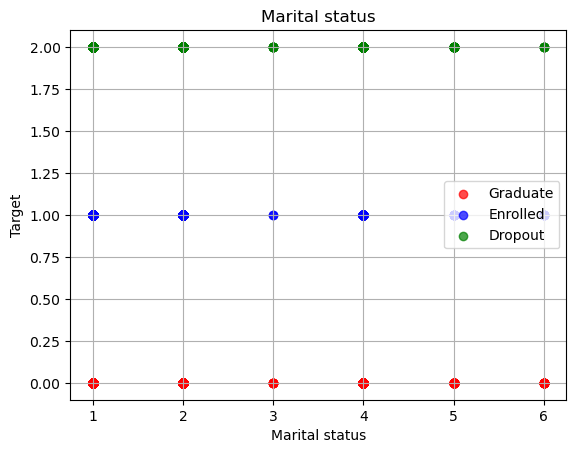

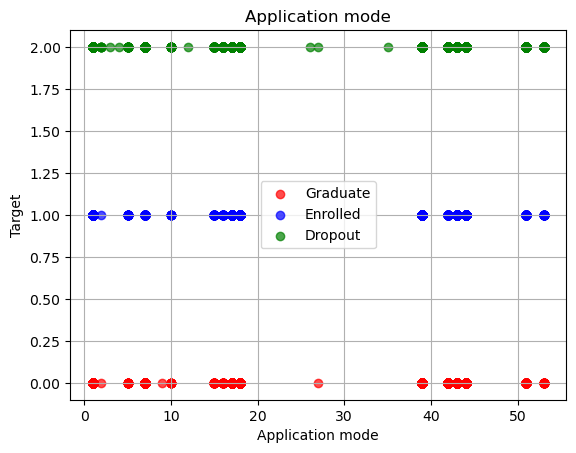

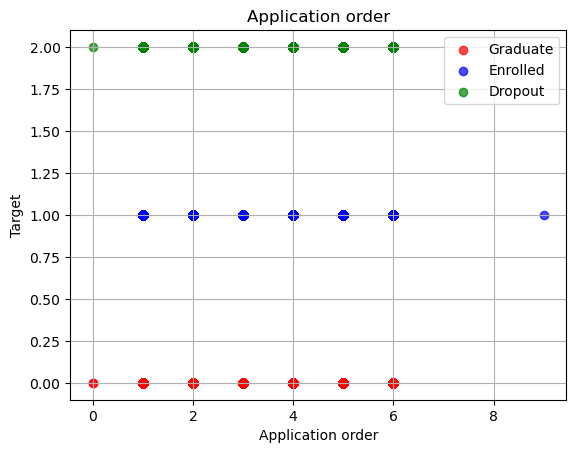

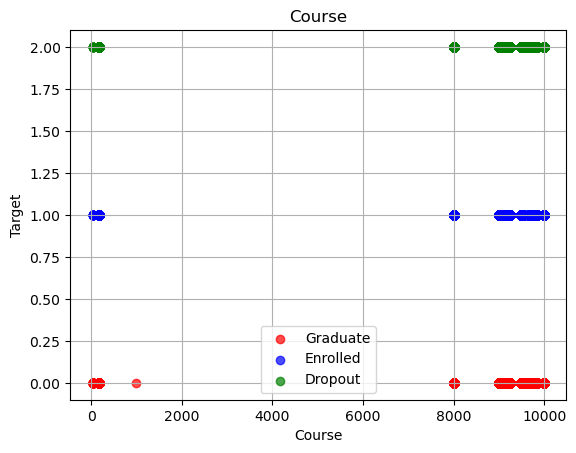

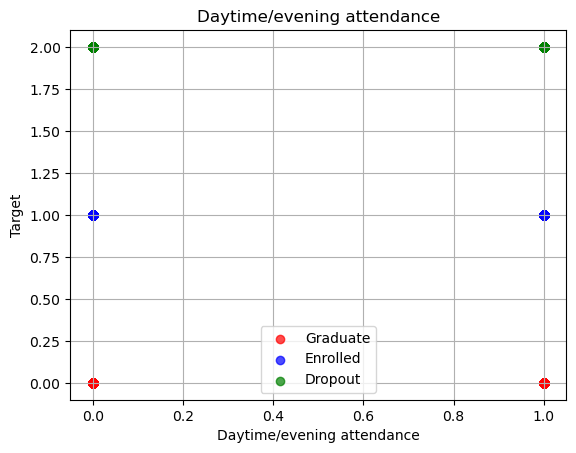

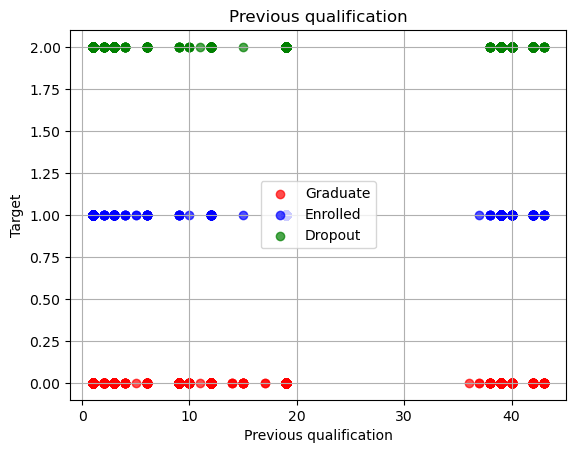

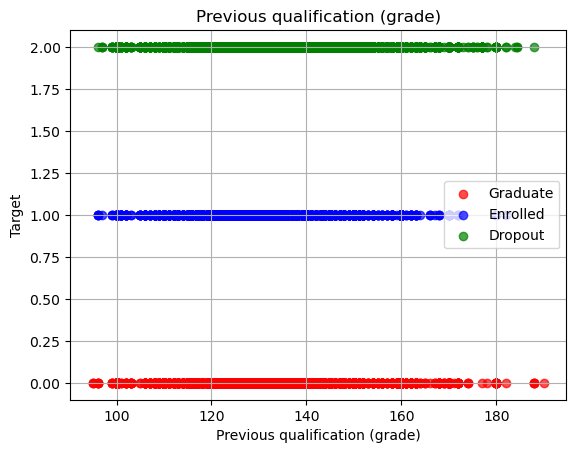

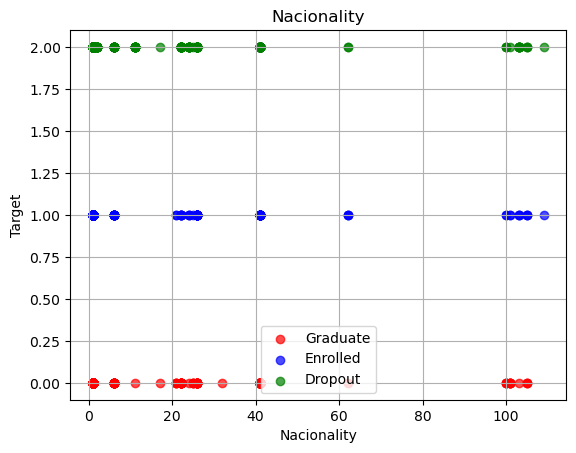

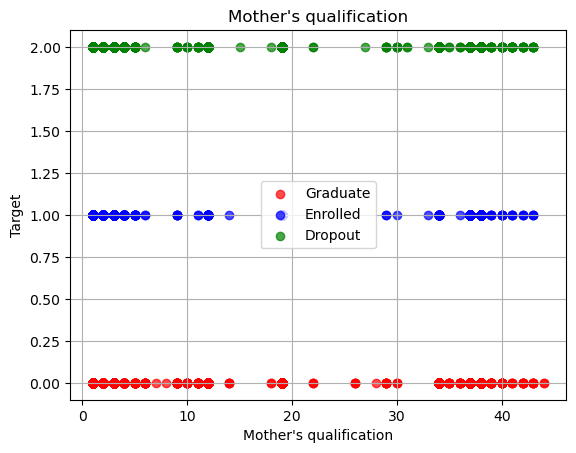

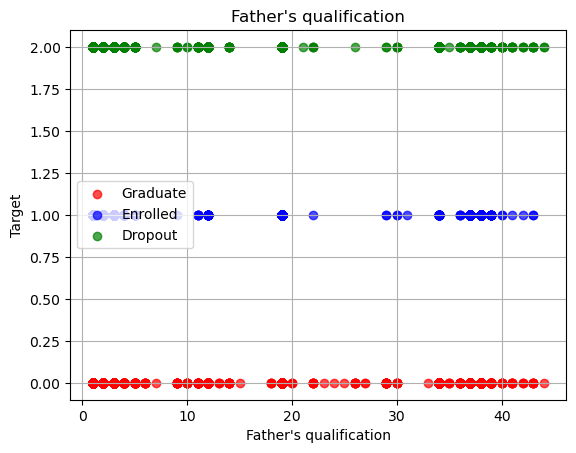

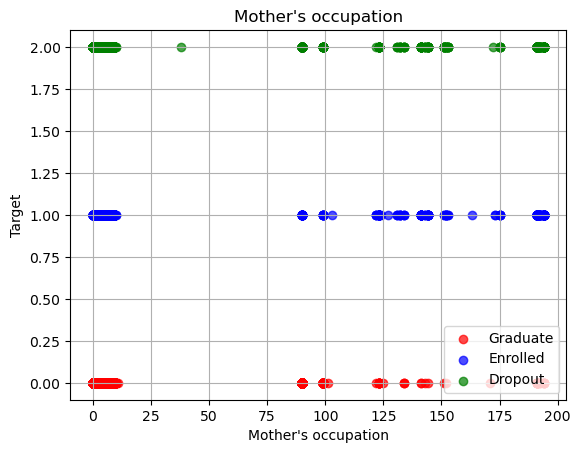

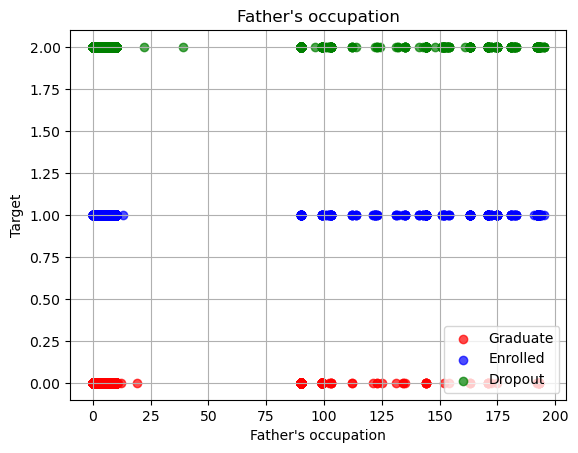

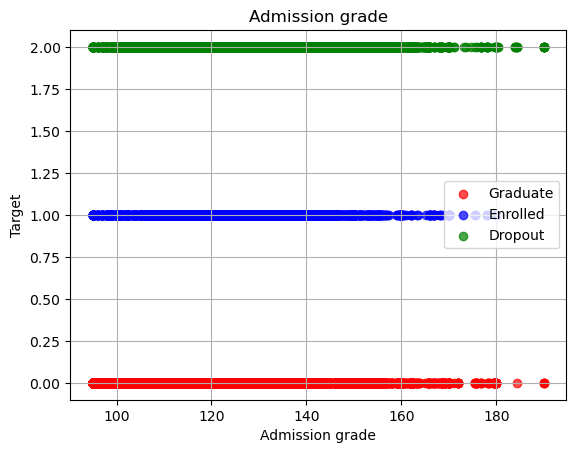

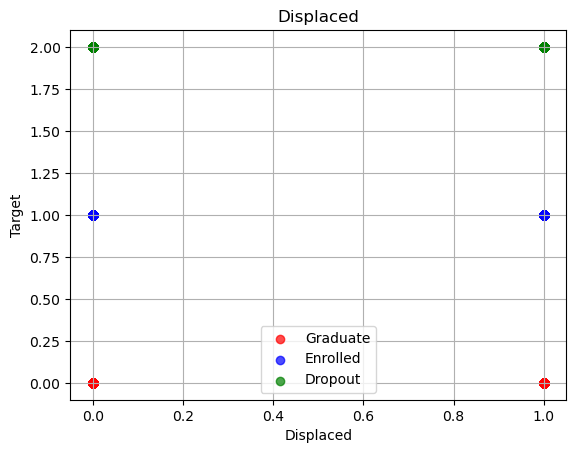

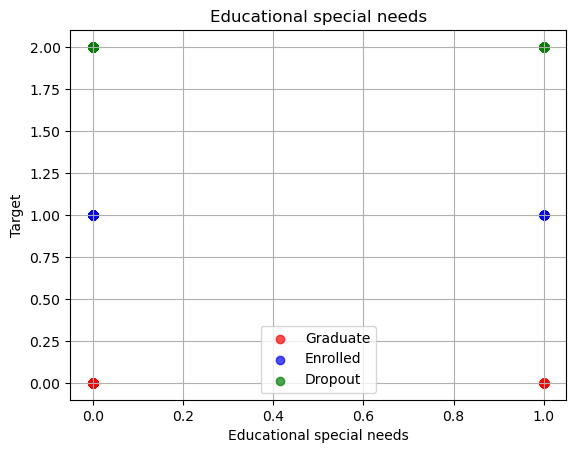

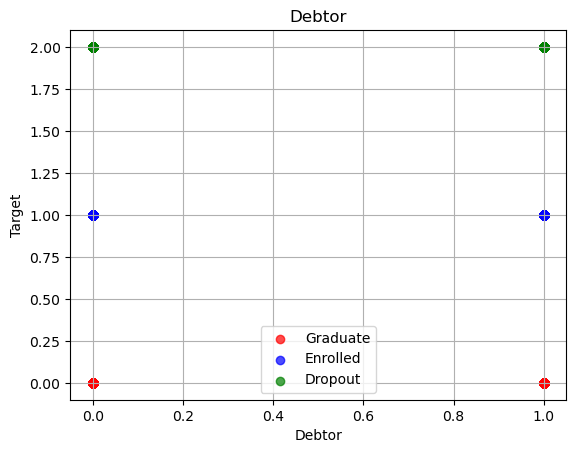

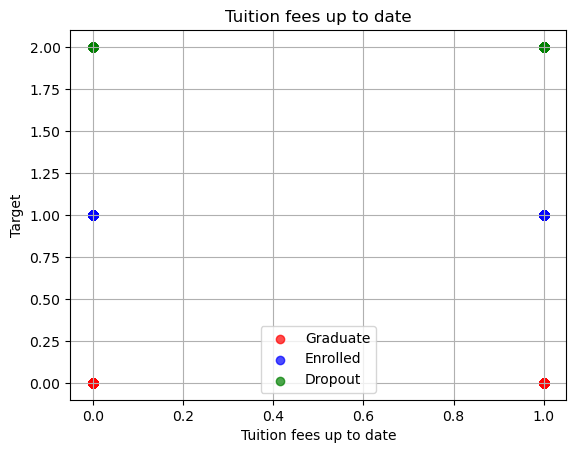

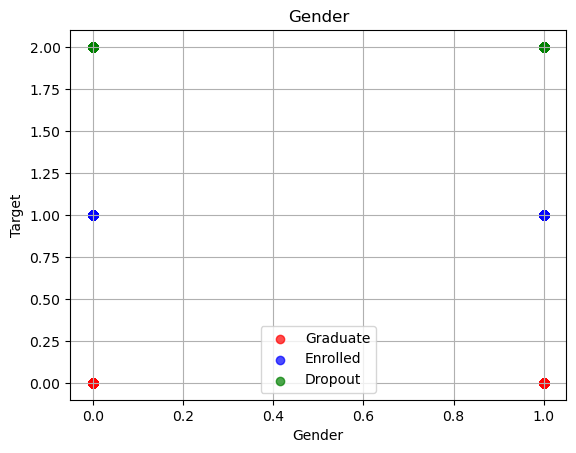

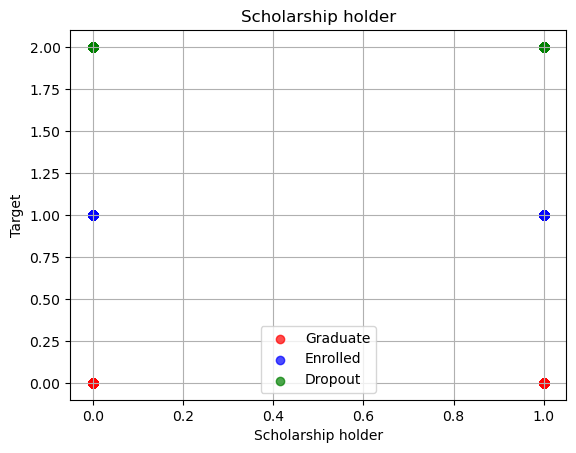

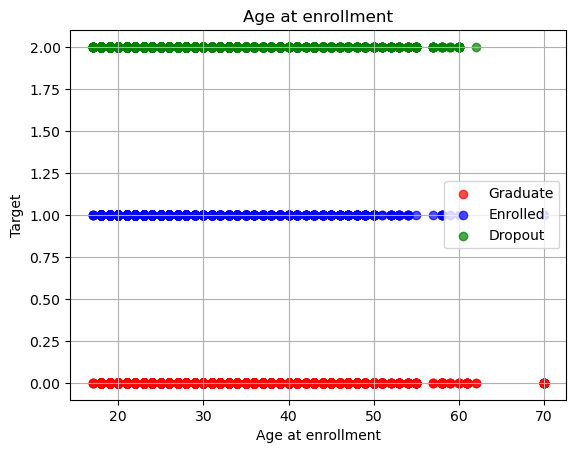

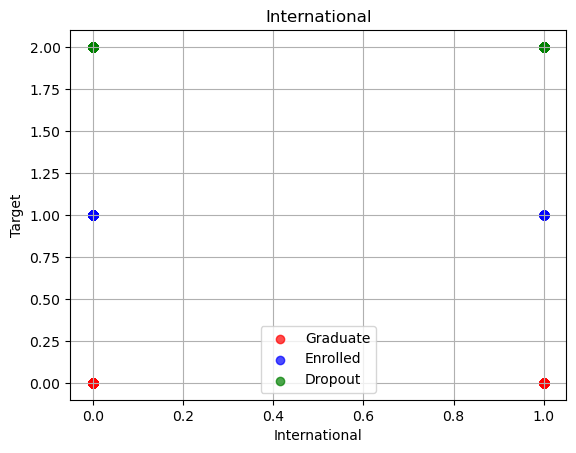

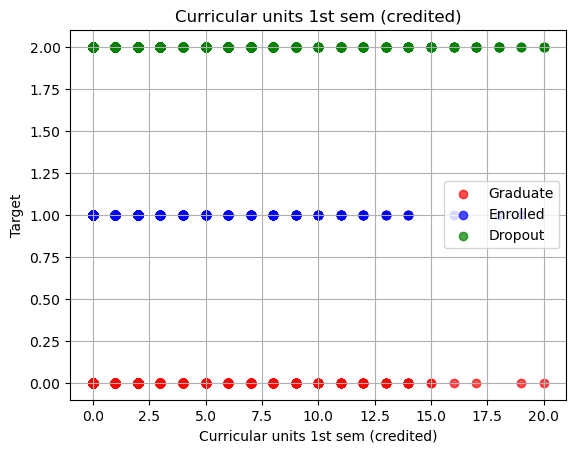

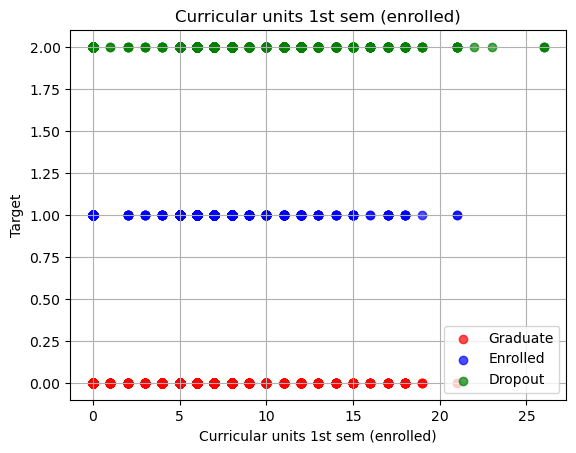

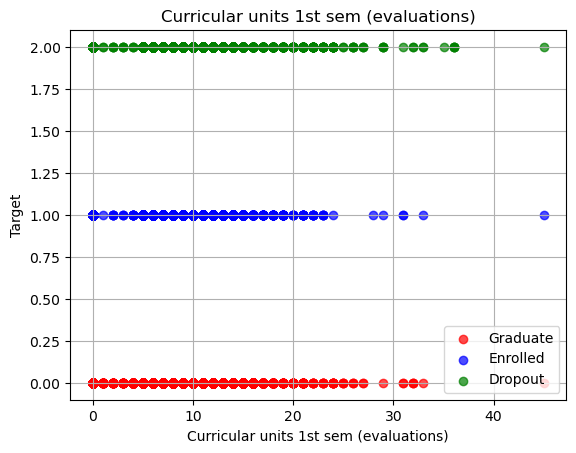

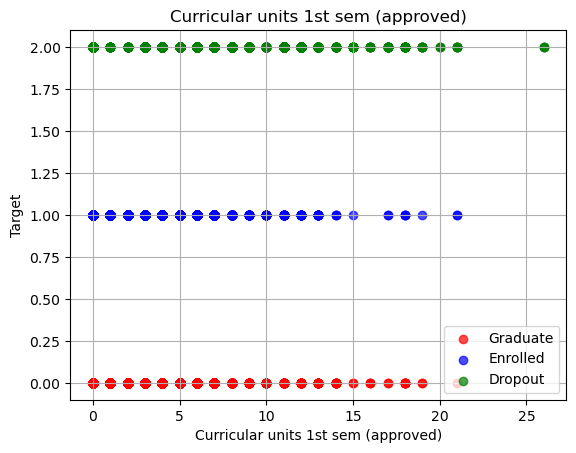

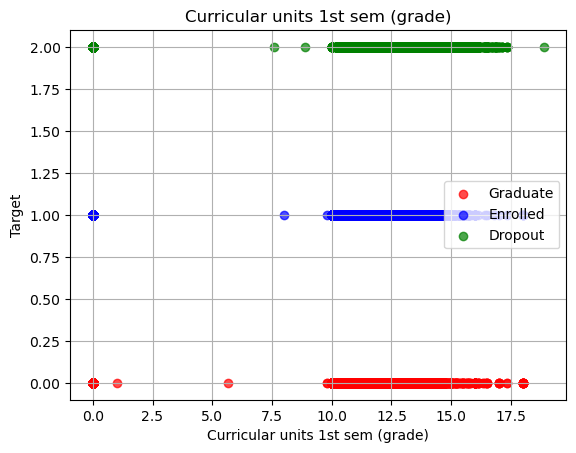

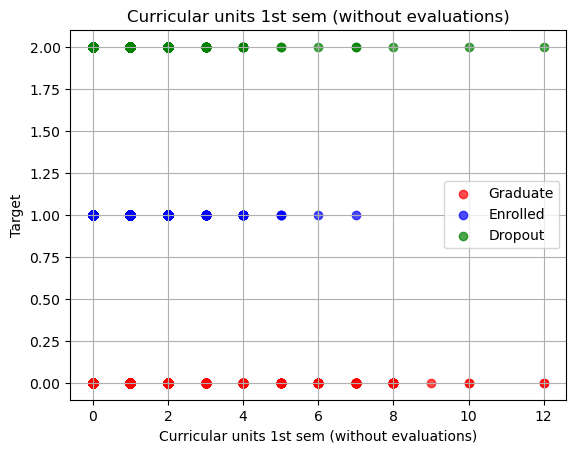

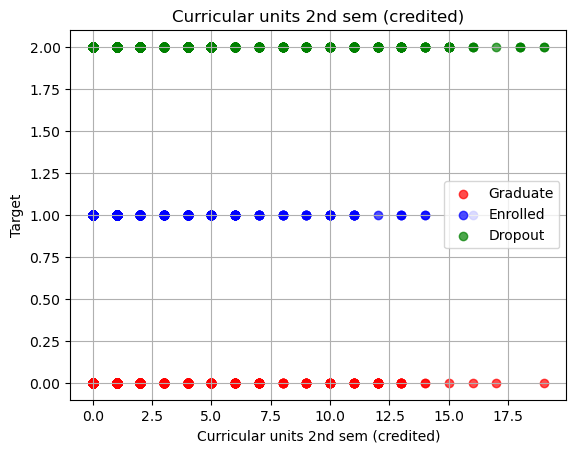

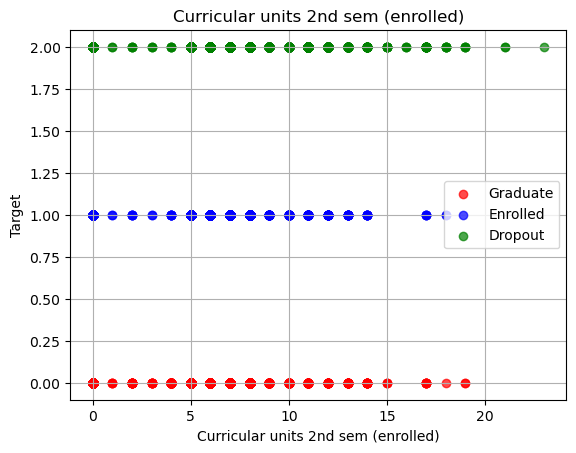

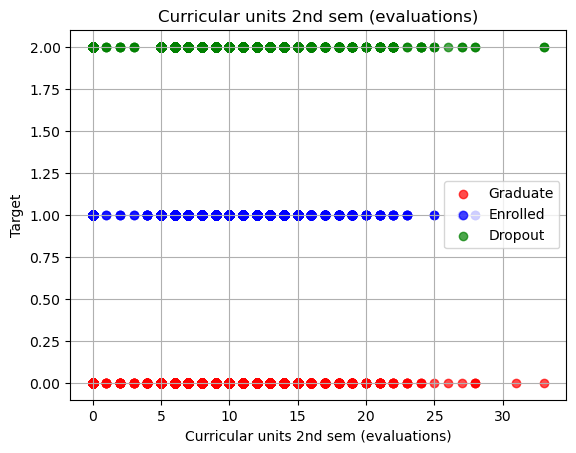

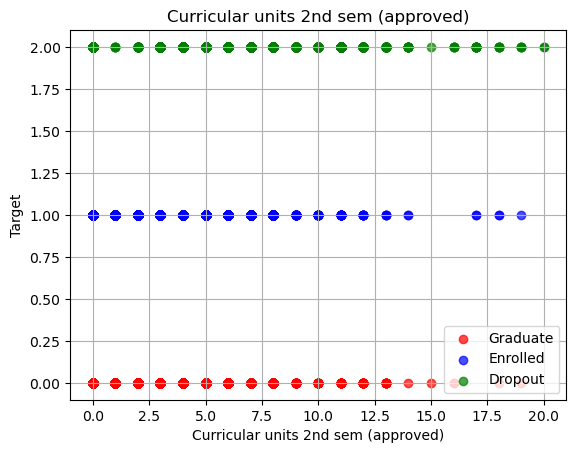

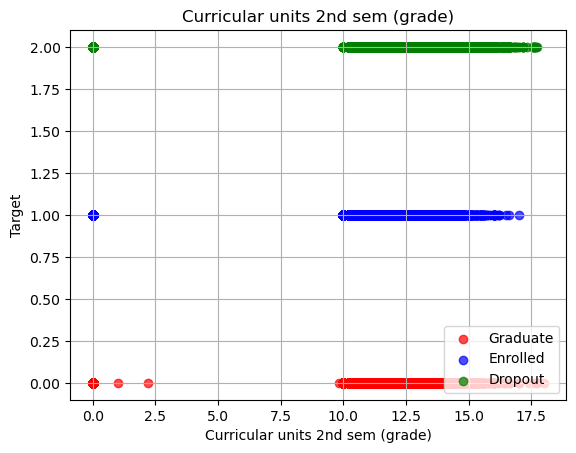

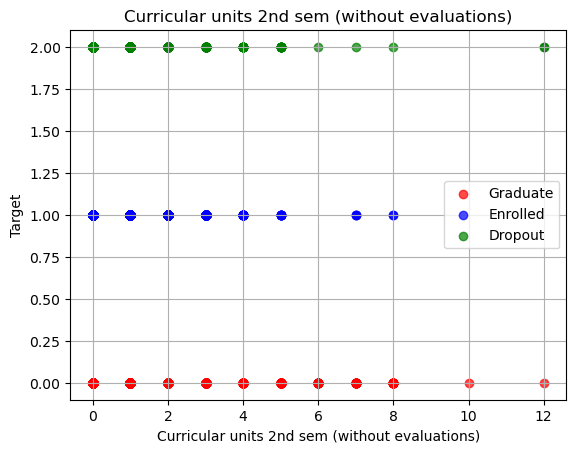

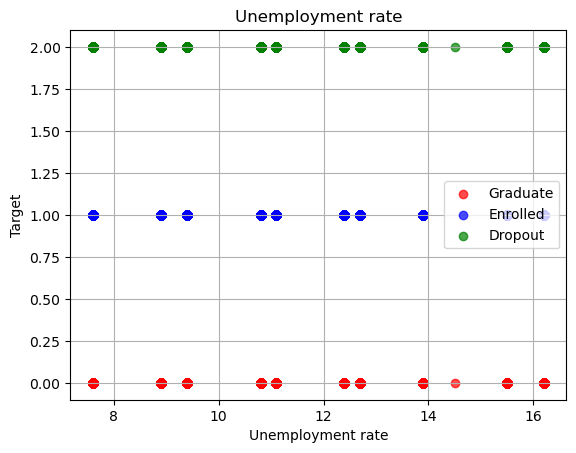

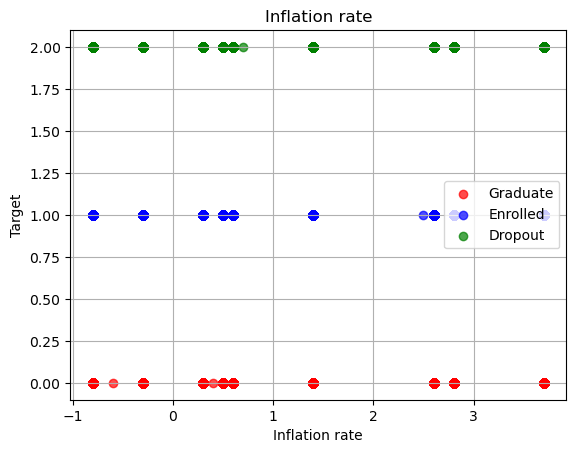

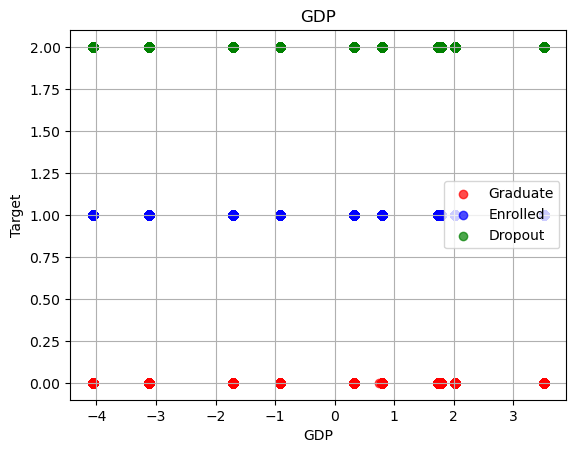

In [24]:
# Plotting scatter training data for relevancy 

def scatter():
    numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns[:-1]:
        plt.figure()
        plt.scatter(train[train['Target'] == 0][column], train[train['Target'] == 0]['Target'], label=names[0], color='red', alpha=0.7)
        plt.scatter(train[train['Target'] == 1][column], train[train['Target'] == 1]['Target'], label=names[2], color='blue', alpha=0.7)
        plt.scatter(train[train['Target'] == 2][column], train[train['Target'] == 2]['Target'], label=names[1], color='green', alpha=0.7)
        plt.legend()
        plt.title(column)
        plt.ylabel('Target')
        plt.xlabel(column)
        plt.grid()
        column = column.replace('/', '_')
        plot_path = f"{_plots}{column.replace('/', '_')}_scatter.jpg"
        plt.savefig(plot_path)
        plt.show()

scatter()

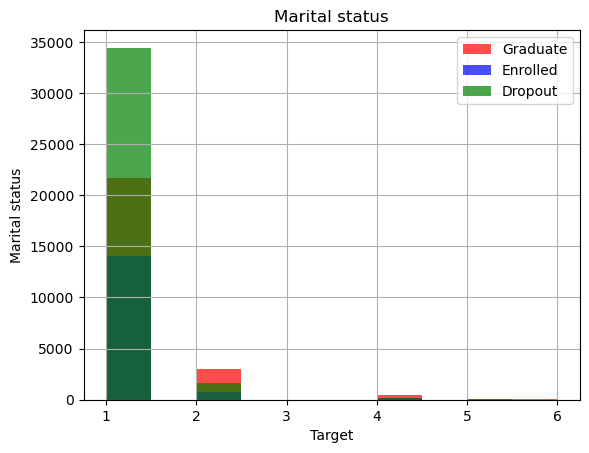

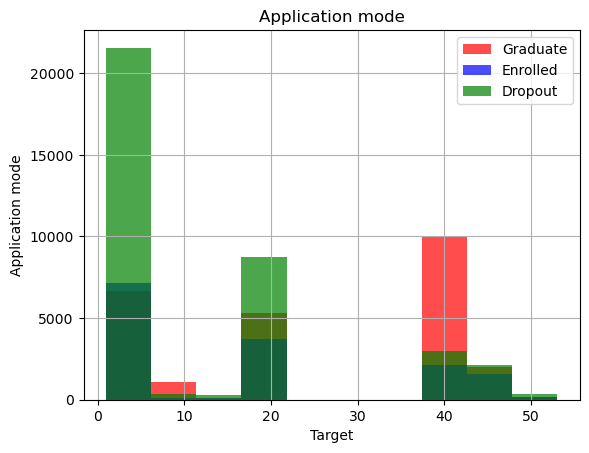

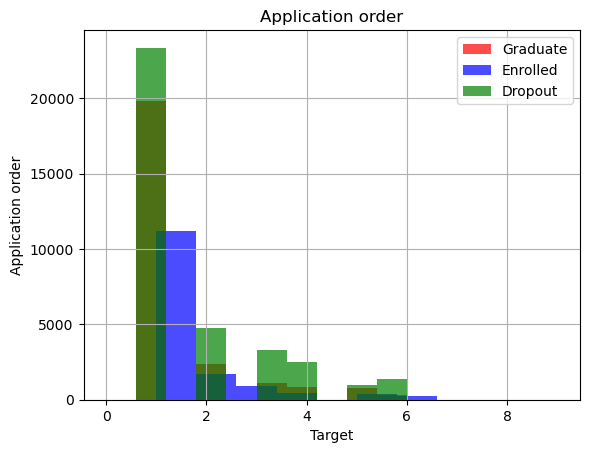

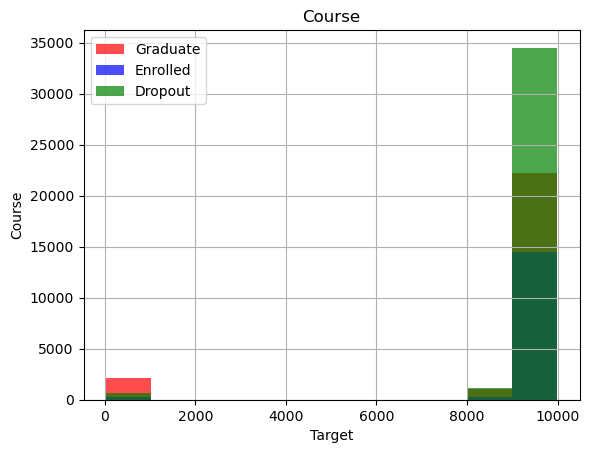

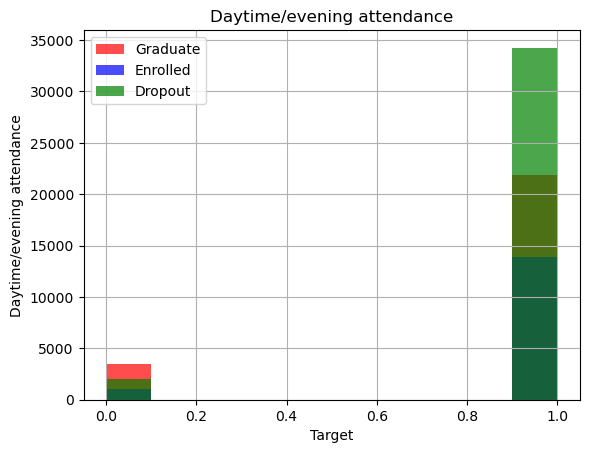

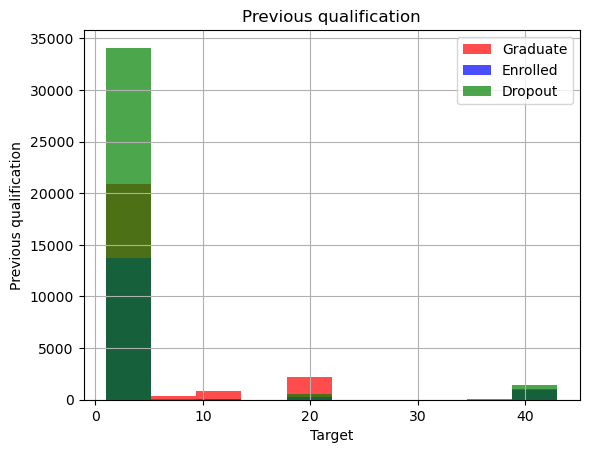

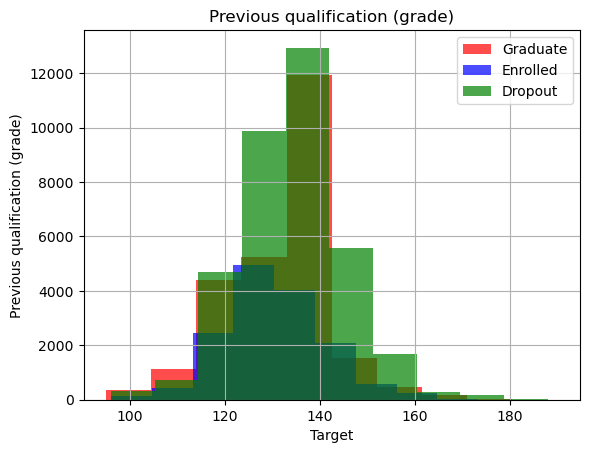

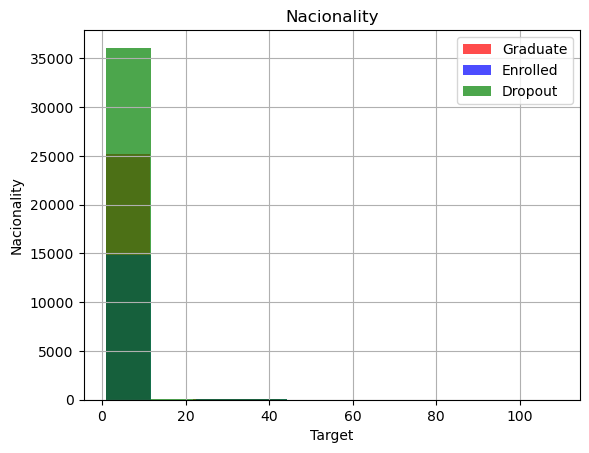

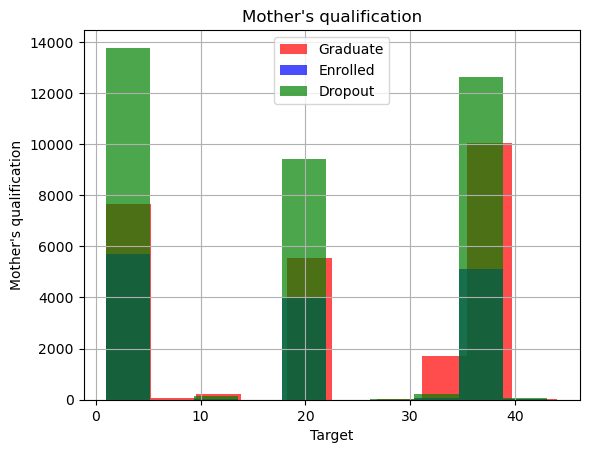

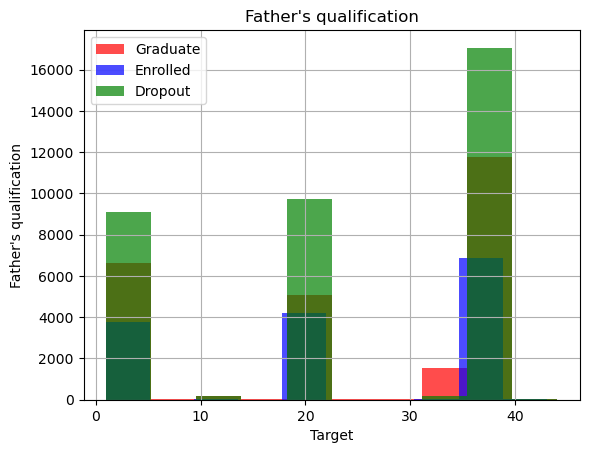

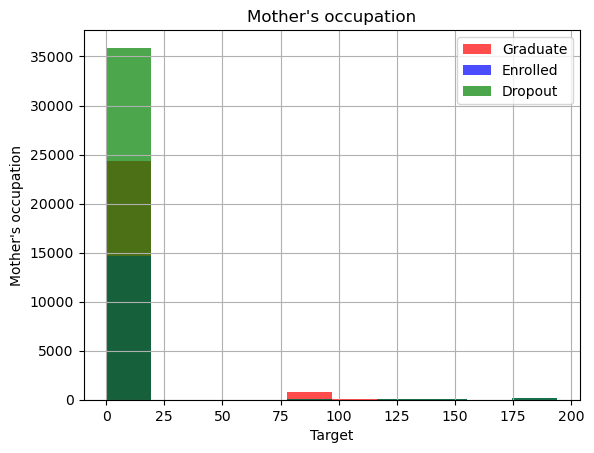

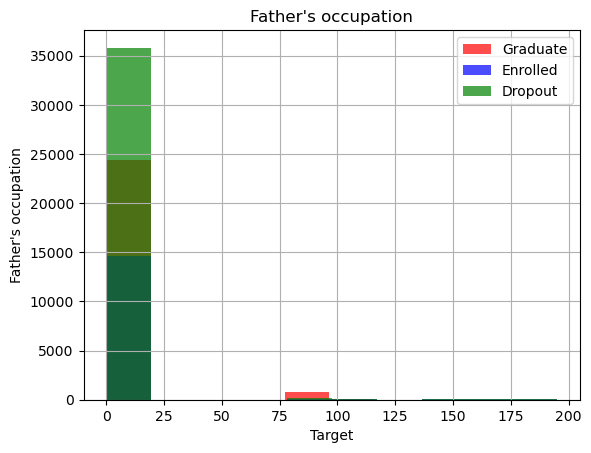

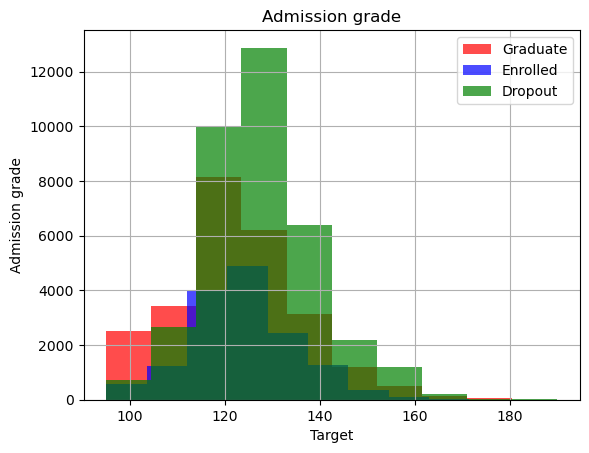

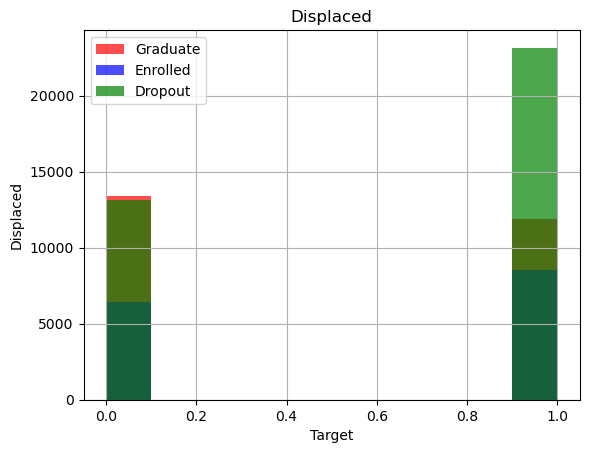

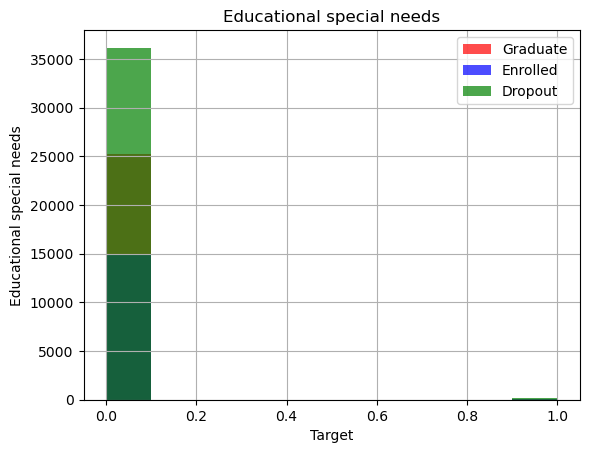

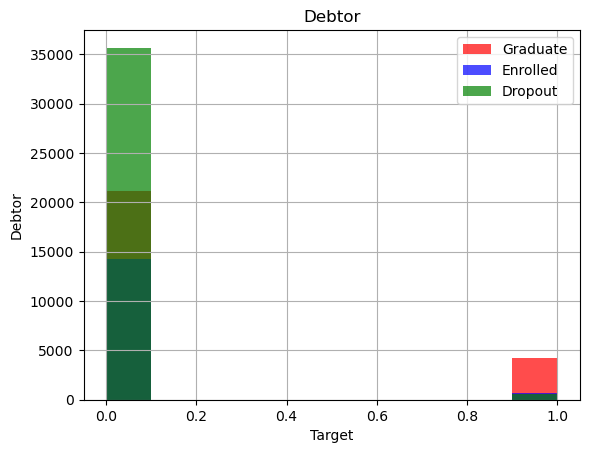

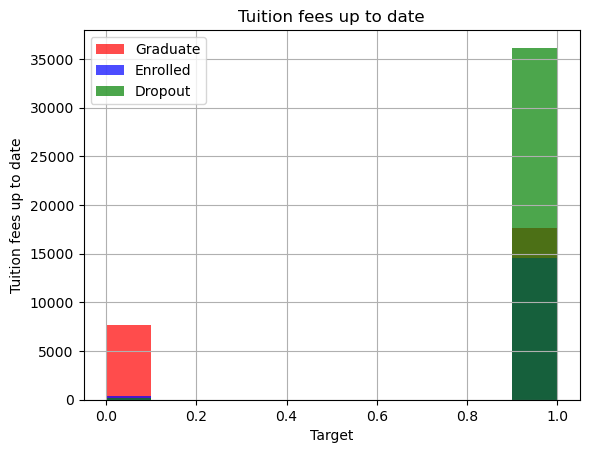

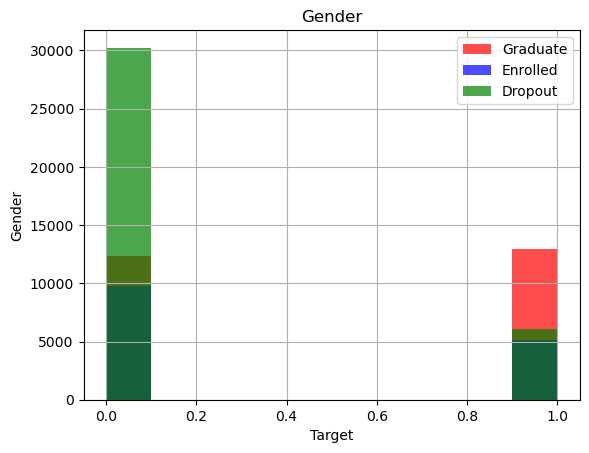

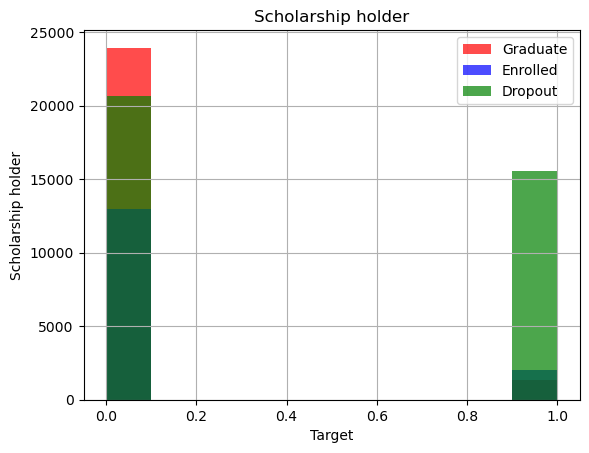

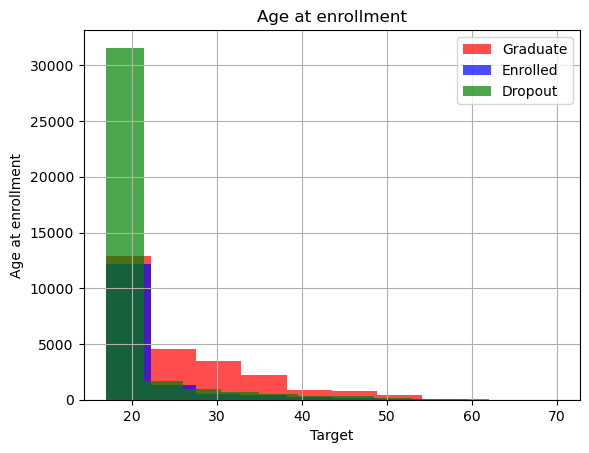

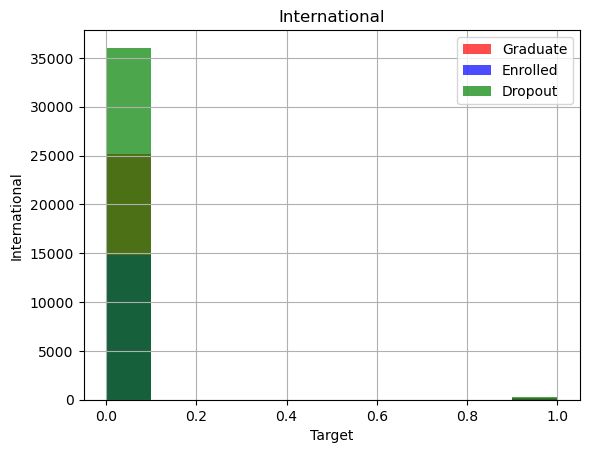

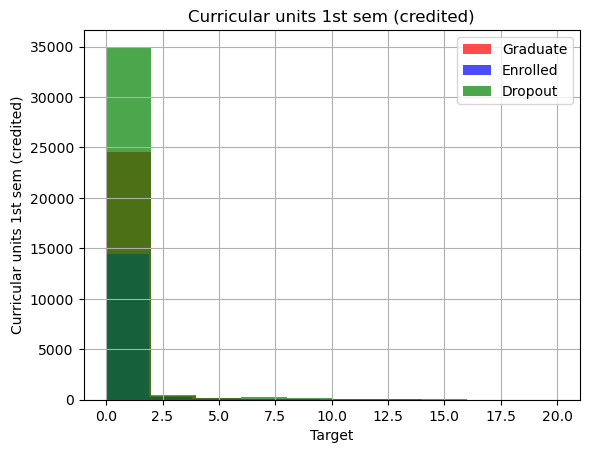

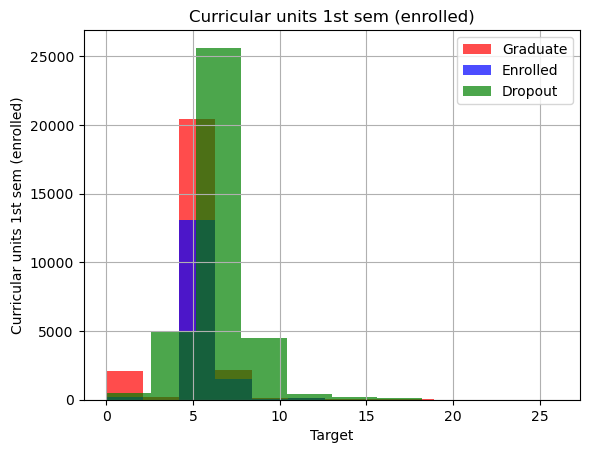

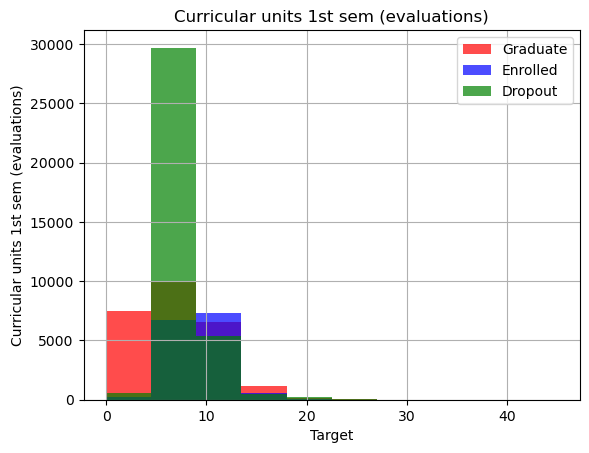

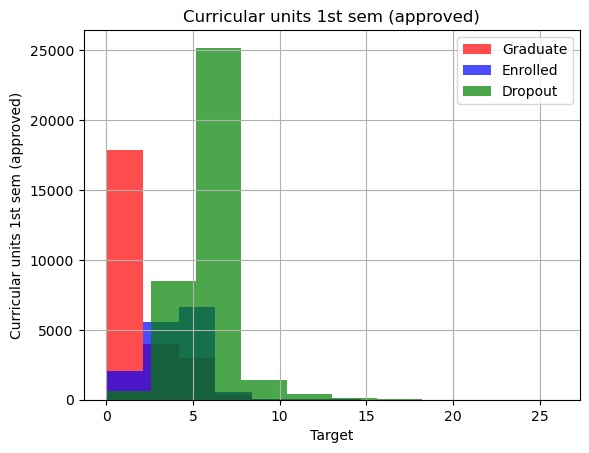

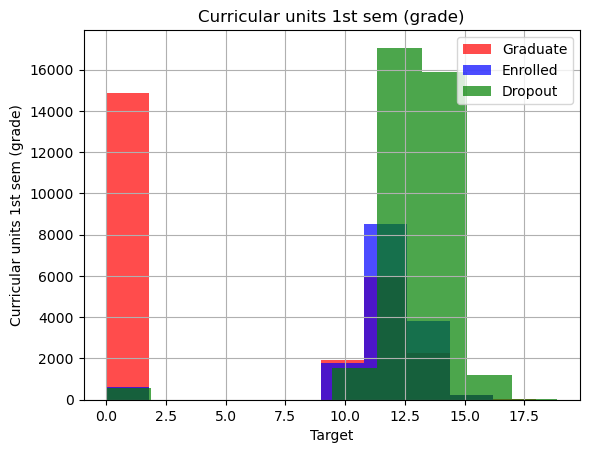

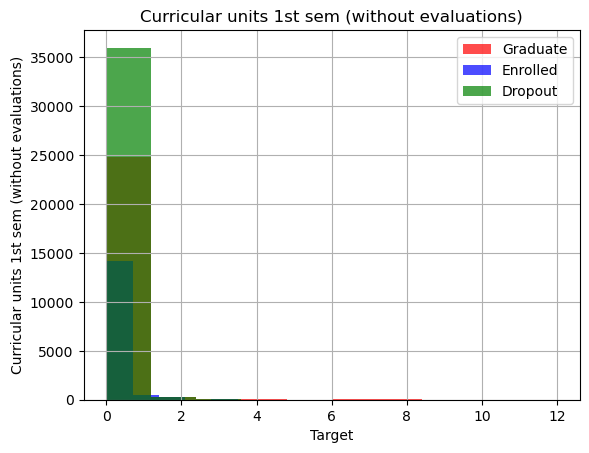

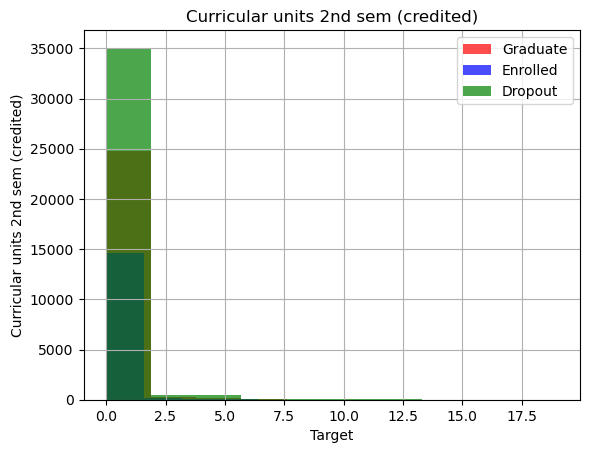

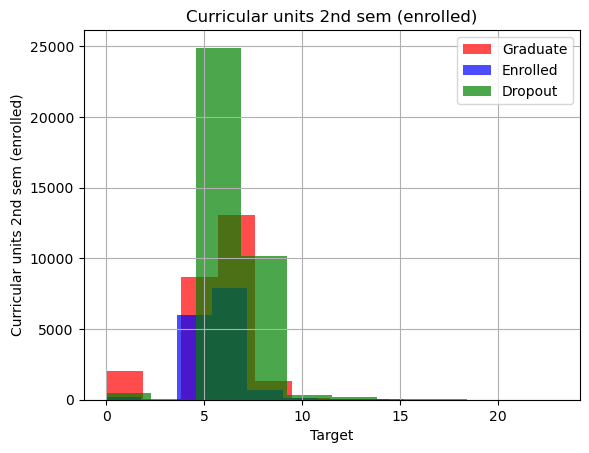

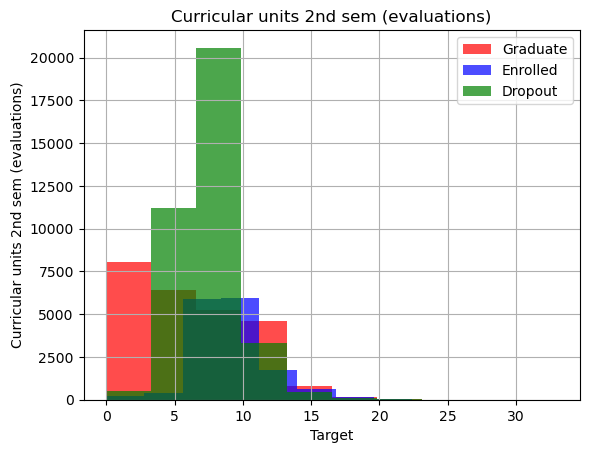

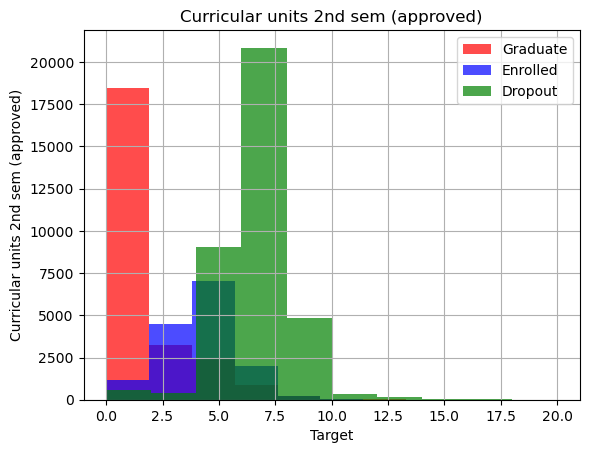

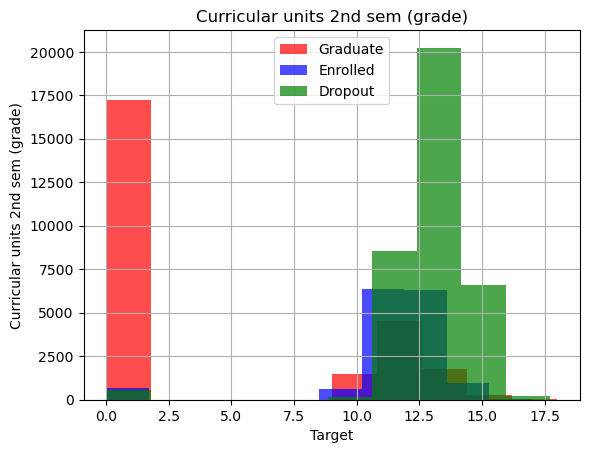

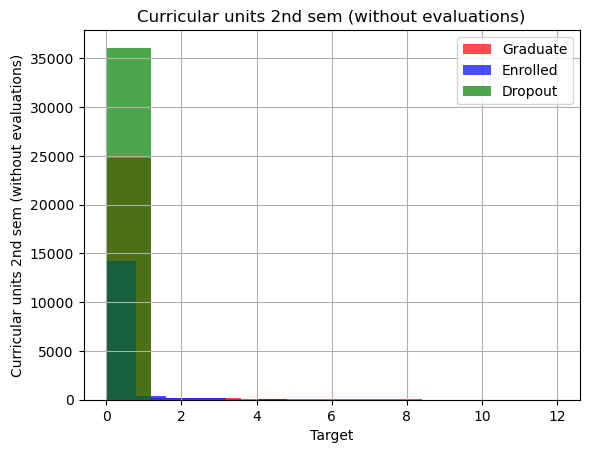

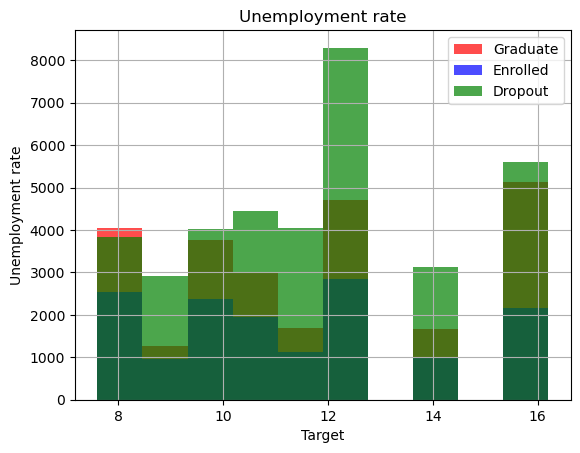

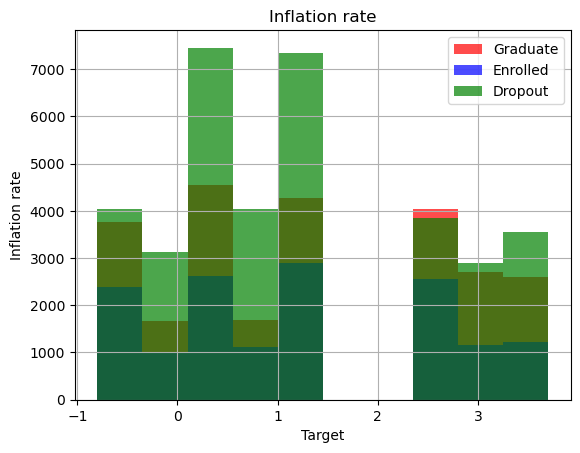

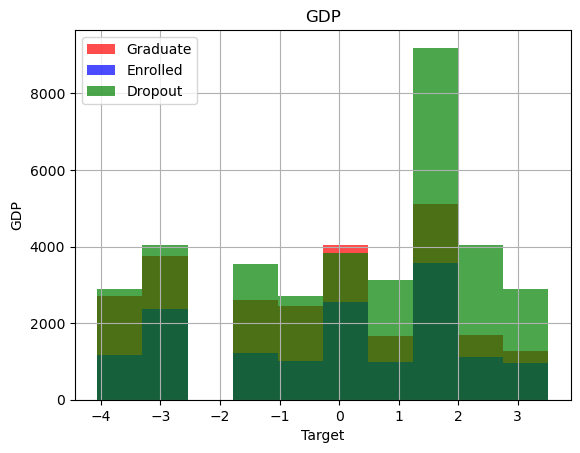

In [26]:
# Plotting histogram training data for relevancy 

def histogram():
    numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns[:-1]:
        plt.figure()
        plt.hist(train[train['Target'] == 0][column], label=names[0], color='red', alpha=0.7, density=False)
        plt.hist(train[train['Target'] == 1][column], label=names[2], color='blue', alpha=0.7, density=False)
        plt.hist(train[train['Target'] == 2][column], label=names[1], color='green', alpha=0.7, density=False)

        plt.legend()
        plt.title(column)
        plt.ylabel(column)
        plt.xlabel('Target')
        plt.grid()
        column = column.replace('/', '_')
        plot_path = f"{_plots}{column.replace(' ', '_')}_histogram.jpg"
        plt.savefig(plot_path)  
        plt.show()

histogram()

# K-NearestNeighboor Model 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4782
           1       0.90      0.96      0.93      5102
           2       0.96      0.91      0.93      3644

    accuracy                           0.94     13528
   macro avg       0.94      0.94      0.94     13528
weighted avg       0.94      0.94      0.94     13528



# Gaussian Naive Bayes Model 

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4782
           1       0.87      0.79      0.83      5102
           2       0.81      0.92      0.86      3644

    accuracy                           0.88     13528
   macro avg       0.87      0.88      0.88     13528
weighted avg       0.88      0.88      0.88     13528



# Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4782
           1       0.74      0.76      0.75      5102
           2       0.72      0.74      0.73      3644

    accuracy                           0.81     13528
   macro avg       0.81      0.80      0.80     13528
weighted avg       0.81      0.81      0.81     13528



# Support Vector Classifier Model

In [33]:
from sklearn.svm import SVC

In [34]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.87      0.09      0.16      4782
           1       0.39      0.99      0.56      5102
           2       0.00      0.00      0.00      3644

    accuracy                           0.40     13528
   macro avg       0.42      0.36      0.24     13528
weighted avg       0.45      0.40      0.27     13528



# Decision Tree Cassifier Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4782
           1       0.89      0.90      0.89      5102
           2       0.92      0.91      0.91      3644

    accuracy                           0.91     13528
   macro avg       0.92      0.91      0.91     13528
weighted avg       0.91      0.91      0.91     13528



# Random Forest Classifier Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4782
           1       0.92      0.95      0.94      5102
           2       0.95      0.95      0.95      3644

    accuracy                           0.95     13528
   macro avg       0.95      0.95      0.95     13528
weighted avg       0.95      0.95      0.95     13528



# Linear Discriminant Analysis Model

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.87      0.92      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.90     13528
weighted avg       0.91      0.90      0.90     13528



# Gradient Boosting Classifier Model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4782
           1       0.91      0.93      0.92      5102
           2       0.93      0.94      0.94      3644

    accuracy                           0.94     13528
   macro avg       0.94      0.94      0.94     13528
weighted avg       0.94      0.94      0.94     13528



# Neural Network Classifier Model

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
nnc_model = MLPClassifier()
nnc_model.fit(X_train, y_train)
nnc_pred = nnc_model.predict(X_test)
print(classification_report(y_test, nnc_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4782
           1       0.80      0.94      0.86      5102
           2       0.95      0.77      0.85      3644

    accuracy                           0.89     13528
   macro avg       0.91      0.88      0.89     13528
weighted avg       0.90      0.89      0.89     13528



# X Gradient Boost Classifier

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4782
           1       0.93      0.95      0.94      5102
           2       0.96      0.96      0.96      3644

    accuracy                           0.95     13528
   macro avg       0.95      0.95      0.95     13528
weighted avg       0.95      0.95      0.95     13528



# Cat Boosting Classifier

In [47]:
from catboost import CatBoostClassifier

In [48]:
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print(classification_report(y_test, cat_pred))

Learning rate set to 0.096989
0:	learn: 0.9622528	total: 133ms	remaining: 2m 13s
1:	learn: 0.8551174	total: 208ms	remaining: 1m 44s
2:	learn: 0.7691517	total: 270ms	remaining: 1m 29s
3:	learn: 0.7014624	total: 307ms	remaining: 1m 16s
4:	learn: 0.6424741	total: 341ms	remaining: 1m 7s
5:	learn: 0.5928559	total: 368ms	remaining: 1m 1s
6:	learn: 0.5502034	total: 393ms	remaining: 55.8s
7:	learn: 0.5132970	total: 418ms	remaining: 51.9s
8:	learn: 0.4810992	total: 446ms	remaining: 49.1s
9:	learn: 0.4538586	total: 474ms	remaining: 46.9s
10:	learn: 0.4295501	total: 499ms	remaining: 44.9s
11:	learn: 0.4079467	total: 533ms	remaining: 43.9s
12:	learn: 0.3885035	total: 566ms	remaining: 43s
13:	learn: 0.3719065	total: 599ms	remaining: 42.2s
14:	learn: 0.3569095	total: 632ms	remaining: 41.5s
15:	learn: 0.3430720	total: 660ms	remaining: 40.6s
16:	learn: 0.3315418	total: 696ms	remaining: 40.2s
17:	learn: 0.3218088	total: 723ms	remaining: 39.4s
18:	learn: 0.3127252	total: 765ms	remaining: 39.5s
19:	learn

# Ada Boosting Classifier 

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4782
           1       0.90      0.90      0.90      5102
           2       0.91      0.94      0.93      3644

    accuracy                           0.92     13528
   macro avg       0.92      0.93      0.92     13528
weighted avg       0.92      0.92      0.92     13528



# Quadratic Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [59]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4782
           1       0.89      0.78      0.83      5102
           2       0.81      0.92      0.86      3644

    accuracy                           0.88     13528
   macro avg       0.87      0.88      0.88     13528
weighted avg       0.88      0.88      0.88     13528



# Perceptron Classifier Model

In [62]:
from sklearn.linear_model import Perceptron

In [63]:
ptn_model = Perceptron()
ptn_model.fit(X_train, y_train)
ptn_pred = ptn_model.predict(X_test)
print(classification_report(y_test, ptn_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4782
           1       0.80      0.40      0.53      5102
           2       0.53      0.97      0.68      3644

    accuracy                           0.72     13528
   macro avg       0.77      0.75      0.71     13528
weighted avg       0.79      0.72      0.71     13528



# Ridge Classifier Model

In [69]:
from sklearn.linear_model import RidgeClassifier

In [70]:
rig_model = RidgeClassifier()
rig_model.fit(X_train, y_train)
rig_pred = ptn_model.predict(X_test)
print(classification_report(y_test, rig_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4782
           1       0.80      0.40      0.53      5102
           2       0.53      0.97      0.68      3644

    accuracy                           0.72     13528
   macro avg       0.77      0.75      0.71     13528
weighted avg       0.79      0.72      0.71     13528



# Logistic Regression Cross Validation

In [65]:
from sklearn.linear_model import LogisticRegressionCV

In [66]:
lcv_model = LogisticRegressionCV()
lcv_model.fit(X_train, y_train)
lcv_pred = lcv_model.predict(X_test)
print(classification_report(y_test, lcv_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.88      0.91      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.91     13528
weighted avg       0.91      0.90      0.91     13528



# Bagging Classifier Model

In [72]:
from sklearn.ensemble import BaggingClassifier

In [73]:
bgf_model = BaggingClassifier()
bgf_model.fit(X_train, y_train)
bgf_pred = lcv_model.predict(X_test)
print(classification_report(y_test, bgf_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.88      0.91      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.91     13528
weighted avg       0.91      0.90      0.91     13528



# Extra Trees Classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

In [75]:
ext_model = ExtraTreesClassifier()
ext_model.fit(X_train, y_train)
ext_pred = lcv_model.predict(X_test)
print(classification_report(y_test, ext_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.88      0.91      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.91     13528
weighted avg       0.91      0.90      0.91     13528



# Passive Aggressive Classifier

In [78]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [79]:
pac_model = PassiveAggressiveClassifier()
pac_model.fit(X_train, y_train)
pac_pred = lcv_model.predict(X_test)
print(classification_report(y_test, pac_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.88      0.91      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.91     13528
weighted avg       0.91      0.90      0.91     13528



# Hist Gradient Boosting Classifier

In [97]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [98]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)
hgb_pred = lcv_model.predict(X_test)
print(classification_report(y_test, hgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4782
           1       0.86      0.89      0.88      5102
           2       0.88      0.91      0.90      3644

    accuracy                           0.90     13528
   macro avg       0.91      0.91      0.91     13528
weighted avg       0.91      0.90      0.91     13528



# Check for best metrics

In [99]:
# Print every accuracy score model

def Statistics():
    print("1. KNeighborsClassifier Score: \t\t\t", accuracy_score(y_test, knn_pred))
    print("2. Gaussian Naive Bayes Score: \t\t\t", accuracy_score(y_test, gnb_pred))
    print("3. Logistic Regressor Score: \t\t\t", accuracy_score(y_test, log_pred))
    print("4. Support Vector Classification Score: \t", accuracy_score(y_test, svc_pred))
    print("5. Decision Tree Score: \t\t\t", accuracy_score(y_test, dtc_pred))
    print("6. Random Forest Score: \t\t\t", accuracy_score(y_test, rfc_pred))
    print("7. Linear Discriminant Analysis Score: \t\t", accuracy_score(y_test, lda_pred))
    print("8. Gradient Boost Classifier Score: \t\t", accuracy_score(y_test, gbc_pred))
    print("9. Neural Network Score: \t\t\t", accuracy_score(y_test, nnc_pred))
    print("10. X Gradient Boost Classifier Score: \t\t", accuracy_score(y_test, xgb_pred))
    print("11. Cat Boost Classifier Score: \t\t", accuracy_score(y_test, cat_pred))
    print("12. Ada Boost Classifier Score: \t\t", accuracy_score(y_test, ada_pred))
    print("13. Quadratic Discriminant Analysis Score: \t", accuracy_score(y_test, qda_pred))
    print("14. Perceptron Classifier Score: \t\t", accuracy_score(y_test, ptn_pred))
    print("15. Ridge Classifier Score: \t\t\t", accuracy_score(y_test, rig_pred))
    print("16. Logistic Cross Validation Score: \t\t", accuracy_score(y_test, lcv_pred))
    print("17. Bagging Classifier Score: \t\t\t", accuracy_score(y_test, bgf_pred))
    print("18. Extra Trees Classifier Score: \t\t", accuracy_score(y_test, ext_pred))
    print("19. Passive Aggressive Classifier Score: \t", accuracy_score(y_test, pac_pred))
    print("20. Hist Gradient Boosting Score: \t\t", accuracy_score(y_test, hgb_pred))

Statistics()

1. KNeighborsClassifier Score: 			 0.9416026020106446
2. Gaussian Naive Bayes Score: 			 0.8765523358959195
3. Logistic Regressor Score: 			 0.8069929036073329
4. Support Vector Classification Score: 	 0.4036073329390893
5. Decision Tree Score: 			 0.914695446481372
6. Random Forest Score: 			 0.950103489059728
7. Linear Discriminant Analysis Score: 		 0.9040508574807806
8. Gradient Boost Classifier Score: 		 0.9366499112950917
9. Neural Network Score: 			 0.8879361324659965
10. X Gradient Boost Classifier Score: 		 0.9535038438793614
11. Cat Boost Classifier Score: 		 0.9498817267888823
12. Ada Boost Classifier Score: 		 0.9239355410999409
13. Quadratic Discriminant Analysis Score: 	 0.8763305736250739
14. Perceptron Classifier Score: 		 0.7195446481371969
15. Ridge Classifier Score: 			 0.7195446481371969
16. Logistic Cross Validation Score: 		 0.9045683027794205
17. Bagging Classifier Score: 			 0.9045683027794205
18. Extra Trees Classifier Score: 		 0.9045683027794205
19. Passive A

In [100]:
# Save all models locally

def save_models():
    pkl.dump(knn_model, open(f'{_tested}KNearestNeighboor.pkl', 'wb'))
    pkl.dump(gnb_model, open(f'{_tested}GaussianNaiveBaye.pkl', 'wb'))
    pkl.dump(log_model, open(f'{_tested}LogisticRegression.pkl', 'wb'))
    pkl.dump(svc_model, open(f'{_tested}SupportVectorMachine.pkl', 'wb'))
    pkl.dump(dtc_model, open(f'{_tested}DecisionTreeCassifier.pkl', 'wb'))
    pkl.dump(rfc_model, open(f'{_tested}RandomForestClassifier.pkl', 'wb'))
    pkl.dump(lda_model, open(f'{_tested}LinearDiscriminantAnalysis.pkl', 'wb'))
    pkl.dump(gbc_model, open(f'{_tested}GradientBoostingClassifier.pkl', 'wb'))
    pkl.dump(nnc_model, open(f'{_tested}NeuralNetworkClassifier.pkl', 'wb'))
    pkl.dump(xgb_model, open(f'{_tested}XGradientBoostClassifier.pkl', 'wb'))
    pkl.dump(cat_model, open(f'{_tested}CatBoostClassifier.pkl', 'wb'))
    pkl.dump(ada_model, open(f'{_tested}AdaBoostClassifier.pkl', 'wb'))
    pkl.dump(qda_model, open(f'{_tested}QuadraticDiscriminantAnalysis.pkl', 'wb'))
    pkl.dump(ptn_model, open(f'{_tested}Perceptron.pkl', 'wb'))
    pkl.dump(rig_model, open(f'{_tested}RidgeClassifier.pkl', 'wb'))
    pkl.dump(lcv_model, open(f'{_tested}LogisticRegressionCV.pkl', 'wb'))
    pkl.dump(bgf_model, open(f'{_tested}BaggingClassifier.pkl', 'wb'))
    pkl.dump(ext_model, open(f'{_tested}ExtraTreesClassifier.pkl', 'wb'))
    pkl.dump(pac_model, open(f'{_tested}PassiveAggressiveClassifier.pkl', 'wb'))
    pkl.dump(pac_model, open(f'{_tested}HistGradientBoostingClassifier.pkl', 'wb'))

save_models()

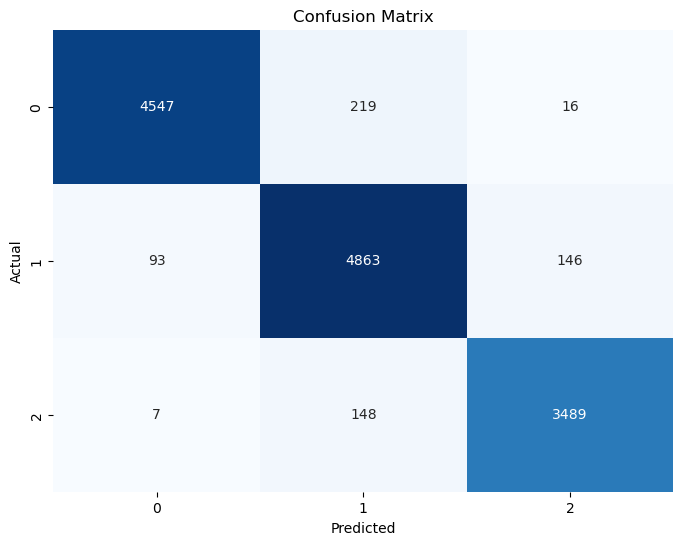

In [51]:
# Print confusion matrix for the best model:

confusion = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform Grid Search Cross Validation

In [52]:
# Set functions to perform text file manipulation

def log_to_file(log_file, text):
    with open(log_file, 'a') as f:
        f.write(text + '\n')

def log_grid_search_results(cv_results, log_file):
    means = cv_results['mean_test_score']
    stds = cv_results['std_test_score']
    params = cv_results['params']
    for mean, std, param in zip(means, stds, params):
        log_to_file(log_file, f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {param}")

In [53]:
# Set grid search cv parameters 

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [54]:
# Reshape the target data
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
# Start the searching for parameters

log_file = f'./model/model.log'
xgb_model = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
log_grid_search_results(grid_search.cv_results_, log_file)

In [ ]:
# Print the best parameters:
grid_search.best_params_

# Pipeline Model & Scaler

In [ ]:
# Create the pipeline

model = ()
pipeline = Pipeline([
    ('scaler', QuantileTransformer()),
    ('model', model)
])

pipeline.fit(X_train, y_train)
y_pipe = pipeline.predict(X_test)
print(classification_report(y_test, y_pipe))
print("Final Score: ", accuracy_score(y_test, y_pipe))

In [ ]:
# Load the info about model in the file

def update_info(full=True):
    info = open(_info, "w")
    pipeline.fit(X_train, y_train)
    y_pipe = pipeline.predict(X_test)
    model_info = [f"Accuracy Score: {accuracy_score(y_test, y_pipe)}\n", 
                  f"Model Name: {pipeline.named_steps['model']}\n", 
                  f"Time:   {dt.datetime.now()}\n\n",
                  f"Report: {classification_report(y_test, y_pipe)}"]
    info.writelines(model_info)
    print(''.join(model_info))
    if full:
        pipeline.fit(X_data, y_data)

In [ ]:
# Load Model In File Project

val = input('Are you sure you want to save the last model: ')
if(val == 'y'):
    update_info(False)
    model = pipeline
    print('Saving . . .')
    pkl.dump(model, open(_model, 'wb'))

# Send Submission

In [ ]:
test = import_data(_test, index_col="id", engine="pyarrow")

test["Policy_Sales_Channel"] = test["Policy_Sales_Channel"].astype(np.int16)
test["Region_Code"] = test["Region_Code"].astype(np.int8)
index = int(pd.read_csv(_submission, nrows=1)['id'][0])
test = pd.get_dummies(test, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

test.rename(columns={
    'Vehicle_Age_< 1 Year': 'Vehicle Age Less than 1 yr',
    'Vehicle_Age_1-2 Year': 'Vehicle Age between 1 and 2 yrs',
    'Vehicle_Age_> 2 Years': 'Vehicle Age greater than 2 yrs'
}, inplace=True)

cat_pred = cat_model.predict(test)
submission = pd.DataFrame({
    'id': range(index, index + len(test)),
    'Response': cat_pred
})
submission.to_csv(_submission, index=False)
submission.head()

In [ ]:
# Final plot of the distribution output

plt.figure(figsize=(10, 6))
sns.countplot(data=submission, x="Response")
plt.grid()
plt.show()

In [101]:
# Display all models

index = 1
for trainers in os.listdir(_tested):
    print(f"{index}. {trainers.replace('.pkl', '')}")
    index += 1


1. KNearestNeighboor
2. GaussianNaiveBaye
3. LogisticRegression
4. SupportVectorMachine
5. DecisionTreeCassifier
6. RandomForestClassifier
7. LinearDiscriminantAnalysis
8. GradientBoostingClassifier
9. NeuralNetworkClassifier
10. XGradientBoostClassifier
11. CatBoostClassifier
12. AdaBoostClassifier
13. QuadraticDiscriminantAnalysis
14. Perceptron
15. RidgeClassifier
16. LogisticRegressionCV
17. BaggingClassifier
18. ExtraTreesClassifier
19. PassiveAggressiveClassifier
20. HistGradientBoostingClassifier


In [ ]:
# Load the best model 

try:
    id_model = int(input("Select a model id:"))
    final = all_models[id_model - 1]
    _path = f'{_tested}{final}'
    with open(_path, 'rb') as file:
        model = pkl.load(file)
    print(f'Model {final} loaded finished')
except:
    print("Error loading model . . .")